# Time Series Analysis

One important area of application for information theory is time series analysis. Here, we will demonstrate how to compute the *modes of information flow* --- intrinsic, shared, and synergistic --- between the two dimensions of the [tinkerbell attractor](https://en.wikipedia.org/wiki/Tinkerbell_map).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import dit
from dit.inference import binned, dist_from_timeseries
from dit.multivariate import total_correlation as I, intrinsic_total_correlation as IMI

dit.ditParams['repr.print'] = True

Here we define a few constants for this notebook:

In [2]:
TRANSIENTS = 1000
ITERATIONS = 1000000
BINS = 3
HISTORY_LENGTH = 2

## Generating the Time Series

We write a generator for our two time series:

In [3]:
def tinkerbell(x=None, y=None, a=0.9, b=-0.6013, c=2.0, d=0.5):
    if x is None:
        x = np.random.random() - 1
    if y is None:
        y = np.random.random() - 1
    while True:
        x, y = x**2 - y**2 + a*x + b*y, 2*x*y + c*x + d*y
        yield x, y

And then we generate the time series:

In [4]:
tb = tinkerbell()

# throw away transients
[next(tb) for _ in range(TRANSIENTS)]

time_series = np.asarray([next(tb) for _ in range(ITERATIONS)])

And we plot the attractor because it's pretty:

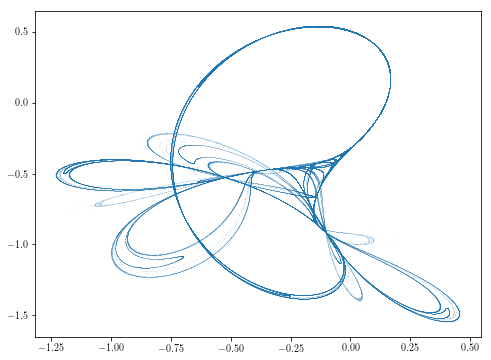

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(time_series[:,0], time_series[:,1], alpha=0.1, s=0.01)

## Discretizing the Time Series

In [6]:
binary_time_series = binned(time_series, bins=BINS)

In [15]:
print(binary_time_series[:10])

[[0 1]
 [1 0]
 [1 1]
 [2 1]
 [2 2]
 [2 2]
 [1 2]
 [0 2]
 [0 0]
 [0 1]]


## Constructing a Distribution from the Time Series

In [7]:
time_series_distribution = dist_from_timeseries(binary_time_series, history_length=HISTORY_LENGTH)

In [8]:
time_series_distribution

Class:          Distribution
Alphabet:       (((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)), ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)), (0, 1, 2), (0, 1, 2))
Base:           linear
Outcome Class:  tuple
Outcome Length: 4
RV Names:       None

x                        p(x)
((0, 0), (0, 0), 0, 1)   0.000791001582003164
((0, 0), (0, 0), 1, 0)   0.0165750331500663
((0, 0), (0, 0), 1, 1)   0.002034004068008136
((0, 0), (0, 1), 1, 0)   0.024921049842099686
((0, 0), (0, 1), 1, 1)   0.000791001582003164
((0, 0), (0, 1), 2, 0)   0.02855305710611421
((0, 0), (0, 2), 1, 0)   1.6000032000064e-05
((0, 0), (0, 2), 2, 0)   3.000006000012e-06
((0, 0), (2, 0), 0, 0)   0.01250002500005
((0, 0), (2, 0), 0, 1)   0.03705707411414823
((0, 0), (2, 0), 1, 0)   0.009256018512037023
((0, 0), (2, 1), 1, 0)   0.001536003072006144
((0, 1), (0, 0), 0, 1)   0.029981059962119923
((0, 1), (0, 0), 1, 1)   0.025474050948101897
((0, 1), (0, 1), 1, 1)   0.002034004068008136
((0, 1), (1, 0), 0, 0)   0.013786027572055144
((0, 1), (1, 0), 0, 1)   0.01912203824407649
((0, 1), (1, 0), 1, 1)   0.04781009562019124
((0, 1), (1, 1), 1, 1)   0.006994013988027976
((0, 1), (2, 0), 0, 0)   0.01137002274004548
((0, 1), (2, 0), 0, 1)   0.001142002284004568
((0, 2), (0, 0), 0, 0)   0.009994019988039976
((0, 2), (0, 0), 0, 1)   0.001797003594007188
((0, 2), (0, 0), 1, 1)   9.7000194000388e-05
((0, 2), (1, 0), 0, 0)   0.02969505939011878
((0, 2), (2, 0), 0, 0)   3.000006000012e-06
((1, 0), (0, 0), 1, 0)   0.014083028166056333
((1, 0), (0, 0), 2, 0)   0.011073022146044291
((1, 0), (0, 1), 1, 0)   0.0432250864501729
((1, 0), (0, 1), 1, 1)   0.005878011756023512
((1, 0), (0, 1), 2, 0)   0.001142002284004568
((1, 0), (2, 1), 1, 0)   0.009563019126038252
((1, 0), (2, 2), 0, 0)   0.014768029536059072
((1, 0), (2, 2), 1, 0)   0.012496024992049984
((1, 1), (0, 1), 1, 1)   0.04849309698619397
((1, 1), (0, 1), 2, 1)   0.024791049582099163
((1, 1), (1, 1), 1, 1)   0.007794015588031176
((1, 1), (1, 1), 2, 1)   0.04331508663017326
((1, 1), (1, 1), 2, 2)   0.014303028606057212
((1, 2), (1, 1), 2, 2)   0.06810613621227242
((1, 2), (1, 2), 2, 2)   0.014303028606057212
((2, 0), (0, 0), 0, 0)   0.0069000138000276
((2, 0), (0, 0), 0, 1)   0.01641703283406567
((2, 0), (0, 0), 0, 2)   1.9000038000076e-05
((2, 0), (0, 0), 1, 0)   0.015541031082062165
((2, 0), (0, 0), 2, 0)   0.00081500163000326
((2, 0), (0, 1), 1, 0)   0.001472002944005888
((2, 0), (0, 1), 1, 1)   0.0003250006500013
((2, 0), (2, 2), 0, 0)   0.04404608809217619
((2, 0), (2, 2), 0, 1)   0.001536003072006144
((2, 1), (0, 1), 1, 1)   9.7000194000388e-05
((2, 1), (2, 2), 0, 1)   0.009563019126038252
((2, 1), (2, 2), 0, 2)   0.027264054528109056
((2, 2), (1, 2), 2, 2)   0.06810613621227242
((2, 2), (2, 2), 0, 2)   0.045582091164182326
((2, 2), (2, 2), 1, 2)   0.03682707365414731
((2, 2), (2, 2), 2, 2)   0.058823117646235296

Finally, we assign helpful variable names to the indicies of the distribution:

In [9]:
x_past = [0]
y_past = [1]
x_pres = [2]
y_pres = [3]

## Measuring the Modes of Information Flow

In [16]:
intrinsic_x_to_y = IMI(time_series_distribution, [x_past, y_pres], y_past)
time_delayed_mutual_information_x_to_y = I(time_series_distribution, [x_past, y_pres])
transfer_entropy_x_to_y = I(time_series_distribution, [x_past, y_pres], y_past)

shared_x_to_y = time_delayed_mutual_information_x_to_y - intrinsic_x_to_y
synergistic_x_to_y = transfer_entropy_x_to_y - intrinsic_x_to_y

In [17]:
print(f"Flows from x to y:\n\tIntrinsic: {intrinsic_x_to_y}\n\tShared: {shared_x_to_y}\n\tSynergistic: {synergistic_x_to_y}")

Flows from x to y:
	Intrinsic: 0.5504300355821599
	Shared: 0.6097942892490416
	Synergistic: 0.07758345827849134


In [18]:
intrinsic_y_to_x = IMI(time_series_distribution, [y_past, x_pres], x_past)
time_delayed_mutual_informtaion_y_to_x = I(time_series_distribution, [y_past, x_pres])
transfer_entropy_y_to_x = I(time_series_distribution, [y_past, x_pres], x_past)

shared_y_to_x = time_delayed_mutual_informtaion_y_to_x - intrinsic_y_to_x
synergistic_y_to_x = transfer_entropy_y_to_x - intrinsic_y_to_x

In [19]:
print(f"Flows from y to x:\n\tIntrinsic: {intrinsic_y_to_x}\n\tShared: {shared_y_to_x}\n\tSynergistic: {synergistic_y_to_x}")

Flows from y to x:
	Intrinsic: 0.29978807681976516
	Shared: 0.3536562545354385
	Synergistic: 0.013492692619592628
